Greg Hein                                                         
12/19/2015

Udacity Data Analyst Nanodegree - Investigate a Dataset Project

This project will look at data from Sean Lahman's Baseball Database.
The analysis will utilize the python programming language
with python's scipy, numpy, pandas, and matplotlib.pyplot modules
(see references).

The initial code to read in the Master.csv & Batting.csv Data Files 
from the Lahman Database and convert both into pandas dataframes, along
with importing the necessary modules is below:

In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

###################################################################################
##
##  Udacity Data Analyst Nanodegree "Investigate A Dataset" Project


##  Read in Master & Batting data files and convert to pandas dataframes:

players = pd.read_csv('C:\Users\Hein\Documents\Data Analysis\ProjectTwo\Master.csv')
batters = pd.read_csv('C:\Users\Hein\Documents\Data Analysis\ProjectTwo\Batting.csv')

IOError: File C:\Users\Hein\Documents\Data Analysis\ProjectTwo\Master.csv does not exist

The dataframe columns we will not be using in the analysis are removed in the code below.  

This will maximize the amount of data used in the analysis later when we eliminate
all rows with missing data.  

In [10]:
##  Limit dataframes to the data used in analysis:

players = players[['playerID', 'height', 'weight']]
batters = batters[['playerID', 'yearID', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'HBP', 'SF']]

The question that this project will consider is if there is any correlation between the 
physical characteristics of height and weight of baseball players and their batting performance.  

The measures of batting performance that will be looked at are:  Batting Average (BA), 
On Base Percentage (OBP), Slugging Percentage (SLG), and On Base Plus Slugging Percentage (OPS)
(see references).


In an attempt to eliminate outliers in the data due to small sample size, the analysis will only
consider batters with 100 or more At Bats per year.  Although this number is somewhat arbitrary, 
it was chosen as a conservative estimate of Major League Baseball's rules for qualifying for the 
batting title (see references).

In [11]:
##  Limit data to players with a minimum number of 100 At Bats per season.

batters = batters[batters['AB'] >= 100.0]

The player heights and weights are included in the "Master" file, while the performance measures for each batter per year are in the "Batting" file.  Therefore, it is necessary to merge both dataframes to calculate correlations.  Those dataframes are merged in the code below. 

The decision to merge "left" is an attempt to limit the resulting dataframe to only the players that were batters. The "dropna" qualifier will remove any rows from the dataframe that have any missing values, in an effort to maximize the quality of the data analyzed.  

In [12]:
##  Merge batters dataframe with players dataframe.

data = batters.merge(players, on = 'playerID', how = 'left').dropna(how = 'any')

The dataframe does not contain the measures of batting performance that have been chosen for consideration. 

Those measures can be calculated from the existing data in the dataframe, and the code below adds them to the dataframe.

In [13]:
##  Add Batting Average, On Base Percentage, Slugging Percentage,
##  and On Base Percentage Plus Slugging Percentage to Dataframe:

##  Batting Average:
data['BA'] = data['H'] / data['AB']

##  On Base Percentage:
data['OBP'] = (data['H'] + data['BB'] + data['HBP']) / (data['AB'] + data['BB'] + data['HBP'] + data['SF'])

##  Slugging Percentage:
data['SLG'] = (data['H'] + data['2B'] + (2 * data['3B']) + (3 * data['HR'])) / data['AB']

##  On Base Percentage plus Slugging Percentage:
data['OPS'] = data['OBP'] + data['SLG']

The variables we will analyze are stored in lists:

In [14]:
##  The variables being considered:

player_characteristics = ['height', 'weight']
batting_metrics = ['BA', 'OBP', 'SLG', 'OPS']
all_variables = player_characteristics + batting_metrics

The rows of the data frame each represents one year of performance data 
for each player that has been included in the anaylysis.

In [15]:
##  To see the first few rows of dataframe:

print data.head()

        playerID  yearID   AB    H  2B  3B  HR  BB  HBP  SF  height  weight  \
15824  aaronha01    1954  468  131  27   6  13  28    3   4      72     180   
15825  abramca01    1954  423  124  22   7   6  72    4   1      72     185   
15826  adamsbo03    1954  390  105  25   6   3  55    3   2      70     160   
15827  adcocjo01    1954  500  154  27   5  23  44    3   4      76     210   
15828  agganha01    1954  434  109  13   8  11  47    0   5      74     200   

             BA       OBP       SLG       OPS  
15824  0.279915  0.322068  0.446581  0.768649  
15825  0.293144  0.400000  0.420804  0.820804  
15826  0.269231  0.362222  0.387179  0.749402  
15827  0.308000  0.364791  0.520000  0.884791  
15828  0.251152  0.320988  0.394009  0.714997  


The dataframe size is calculated:

In [16]:
##  The number of data points (player years):

print 'The number of data points (player years): ', len(data['height'])

The number of data points (player years):  21703


To get statistics related to the distribution of the different variables we are considering, the 
mean and standard deviation of each are calculated.

In [18]:
##  The Mean & Standard Deviation of each variable being analyzed:

print 'Mean & Standard Deviation of each variable:'
print ''
for variable in all_variables:
    print variable, data[variable].mean(), '&', data[variable].std()

Mean & Standard Deviation of each variable:

height 72.5053679215 & 2.05530308904
weight 189.63253928 & 20.1936260141
BA 0.259116569633 & 0.0356491050759
OBP 0.326135355267 & 0.0426630207559
SLG 0.395241963668 & 0.0814767747252
OPS 0.721377318936 & 0.115248844573


To get a visualization of the distribution of the different variables we are considering, 
histograms of each are plotted.

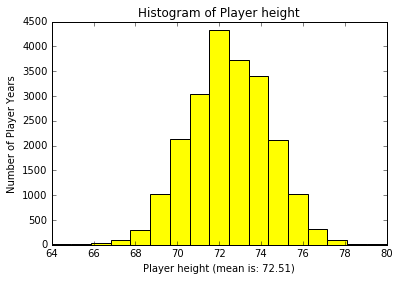

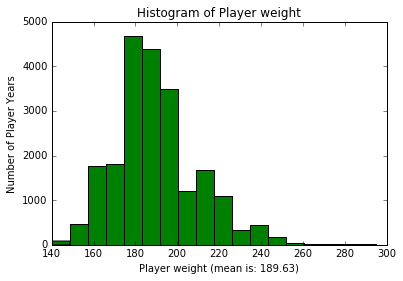

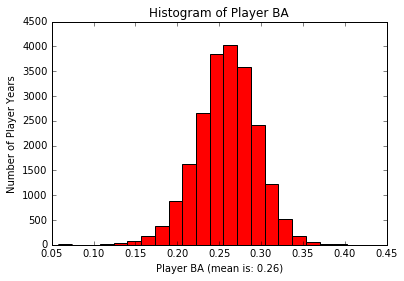

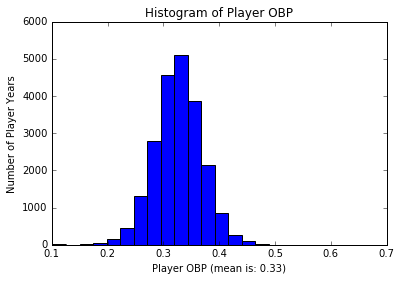

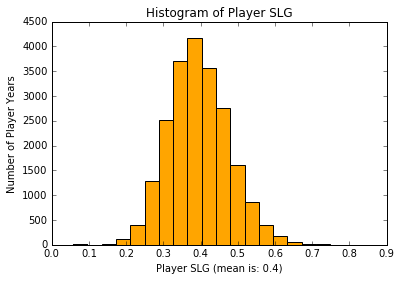

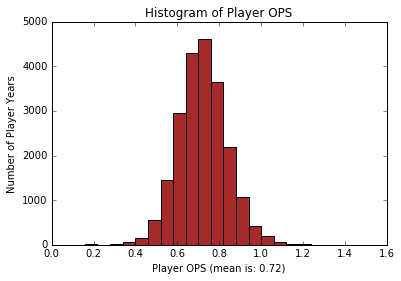

In [19]:
##  Histograms of the variables being analyzed:

def display_histogram(variable, bar_color, num_bins):
    plt.hist(data[variable].dropna().values, bins = num_bins, color = bar_color)
    plt.xlabel('Player ' + variable + ' (mean is: ' + str(round(data[variable].mean(), 2)) + ')')
    plt.ylabel('Number of Player Years')
    plt.title('Histogram of Player ' + variable)
    plt.show()
    return

number_of_bins = [17, 18, 21, 21, 21, 21]
colors = ['yellow', 'green', 'red', 'blue', 'orange', 'brown']

for i in range(len(all_variables)):
    display_histogram(all_variables[i], colors[i], number_of_bins[i])


To get a visualization of the relationship between variables, scatter plots are
given for each:

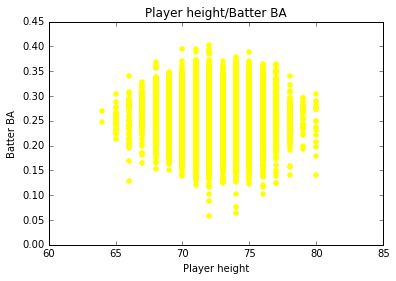

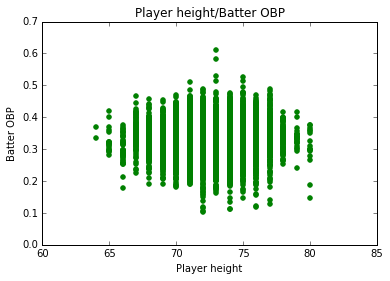

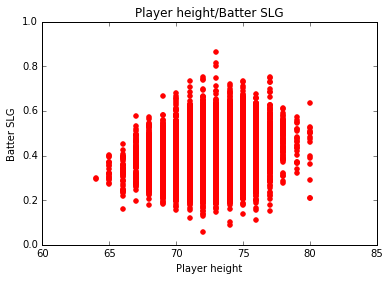

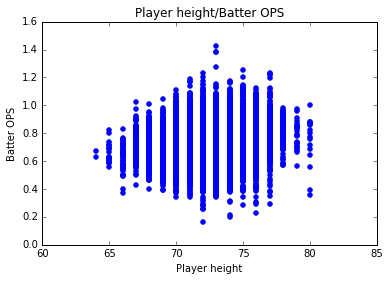

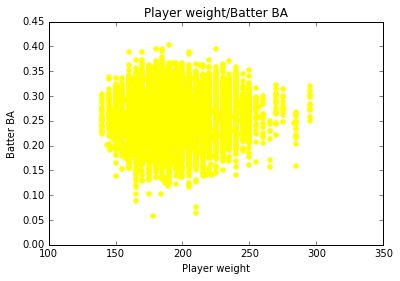

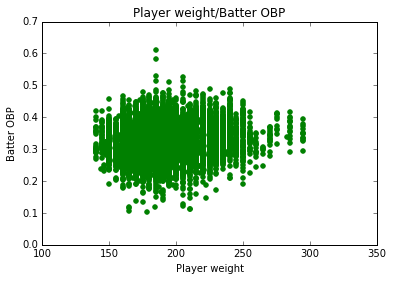

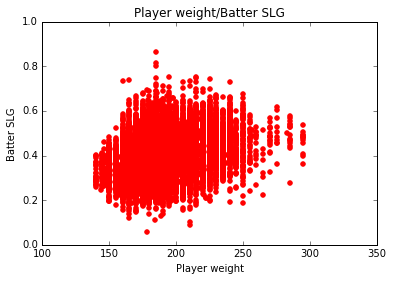

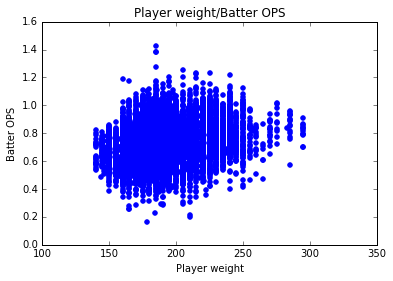

In [20]:
##  Scatter Plots:

def show_scatter_plot(characteristic, metric, data_color):
    plt.scatter(data[characteristic], data[metric], color = data_color)
    plt.xlabel('Player ' + characteristic)
    plt.ylabel('Batter ' + metric)
    plt.title('Player ' + characteristic + '/' + 'Batter ' + metric)
    plt.show()
    return

for i in range(len(player_characteristics)):
    for j in range(len(batting_metrics)):
        char, metric = player_characteristics[i], batting_metrics[j]
        show_scatter_plot(char, metric, colors[j])


The Pearson's r for each pair of variables in the scatter plots above are calculated, along with the p-value for each relationship:

In [21]:
##  Pearson's r and p-values for all comparisons:

print 'Pearson Correlation Coefficients & p-values:'
for i in range(len(player_characteristics)):
    print ''
    for j in range(len(batting_metrics)):
        char, metric = player_characteristics[i], batting_metrics[j]
        print  char + '/' + metric, pearsonr(data[char], data[metric])

Pearson Correlation Coefficients & p-values:

height/BA (0.0033300336098269967, 0.62374363011012612)
height/OBP (0.036079687291552878, 1.0568815705428013e-07)
height/SLG (0.24668019443410277, 3.1358520215321869e-298)
height/OPS (0.18775003913563237, 2.2482319667973123e-171)

weight/BA (0.019278306042637632, 0.004508971689350029)
weight/OBP (0.07911359089173213, 1.7597840679027252e-31)
weight/SLG (0.30472496936021504, 0.0)
weight/OPS (0.2447159670585807, 2.1899381744244059e-293)


Conclusion:

Although not obvious looking at all the scatter plots above, the correlation coefficients calculated immediately above find a positive correlation (Pearson's r) between player height and all batting metrics, and a positive correlation between player weight and all batting metrics.  

If a standard alpha value of 0.05 is chosen, then the correlations are statistically significant (p-value < alpha) for all correlations considered, with one exeption being the correlation between height and batting average.

It is worth mentioning that multiple measures for batting performance were considered due to that fact that there is no one metric that is universally accepted as the best indicator of performance.  It should also be noted Batting Average has fallen out of favor as a measure of batter performance in recent years as the statistical analysis of baseball has become more widespread.

These findings show tenative evidence of a statistically significant positive correlation between player height and batting performance. They also show tenative evidence of a statistically significant positive correlation between player weight and batting performance.  

References used in the preparation and completion of project:

Udacity Intro to Data Analysis Course: https://www.udacity.com

Lahman Database Documentation: http://seanlahman.com/files/database/readme2014.txt

Scipy/Numpy Documentation:  http://www.scipy.org/docs.html

Pandas Documentation:  http://pandas.pydata.org/pandas-docs/stable/

Matplotlib Documentation:  http://matplotlib.org/contents.html

Wikipedia Batting Statistics page:  https://en.wikipedia.org/wiki/Baseball_statistics#Batting_statistics

Wikipedia Batting Average page:  https://en.wikipedia.org/wiki/Batting_average#Qualifications_for_the_batting_title

